In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage.io import imread

# Gaussian convolutions

## Create a Gaussian Kernel

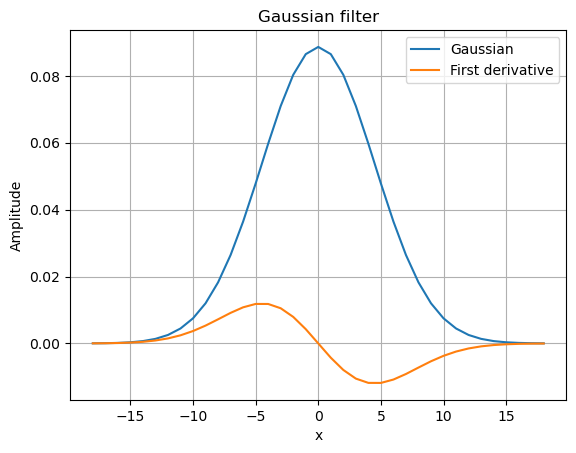

In [2]:
# Parameters
s = 4.5 # standard deviation
t = s**2 # variance
r = np.ceil(4*s) # radius of the filter (np.ceil rounds up to the nearest integer)
x = np.arange(-r, r+1).reshape(1, -1) # x-coordinates of the filter (ensure it is a row vector)

# Gaussian filter
g = np.exp(-x**2/(2*t)) # Gaussian function
g = g / np.sum(g) # Normalize the filter to sum to 1
dg = -x * g / t # First derivative

# Plot the Gaussian filter
plt.figure()
plt.plot(x[0], g[0], label='Gaussian')
plt.plot(x[0], dg[0], label='First derivative')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('Gaussian filter')
plt.legend()
plt.grid()
plt.show()

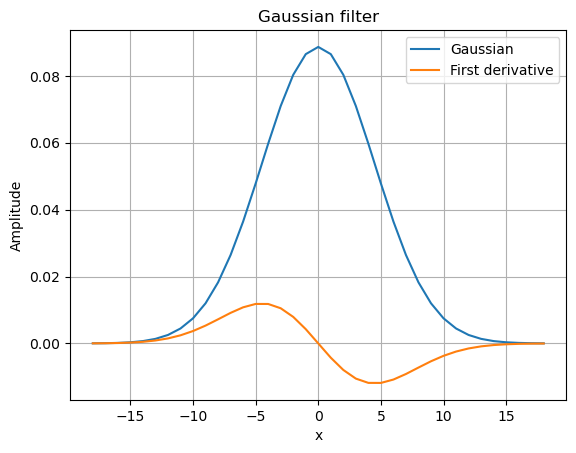

In [3]:
# Create a function that given the standard deviation (s) returns the gaussian filter (g) and its first derivative (dg)

def gaussian_filter(s):
    t = s**2 # variance
    r = np.ceil(4*s) # radius of the filter (np.ceil rounds up to the nearest integer)
    x = np.arange(-r, r+1).reshape(1, -1) # x-coordinates of the filter (ensure it is a row vector)
    g = np.exp(-x**2/(2*t)) # Gaussian function
    g = g / np.sum(g) # Normalize the filter to sum to 1
    dg = -x * g / t # First derivative
    return g, dg

# Try the function
s = 4.5
g, dg = gaussian_filter(s)

# Plot the Gaussian filter
plt.figure()
plt.plot(x[0], g[0], label='Gaussian')
plt.plot(x[0], dg[0], label='First derivative')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('Gaussian filter')
plt.legend()
plt.grid()
plt.show()

## Verify separability

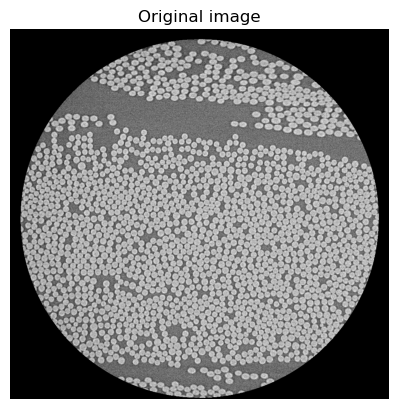

In [4]:
# It is the same to apply 2 1D filters than to apply a 2D filter

# Load the image
dir = 'data/'
img = imread(dir + 'fibres_xcth.png').astype(float)

# Show the image
plt.figure()
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.show()

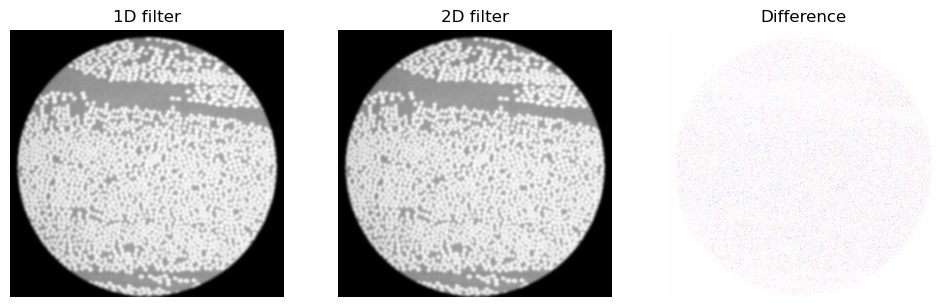

Mean absolute difference: 2.3506883973031585e-11


In [5]:
# Get the Kernel
s = 4.5
g, dg = gaussian_filter(s)

# Apply the filter
# 1D filter
img_g = convolve(convolve(img, g), g.T) # 1D filter

# 2D filter
g2d = np.dot(g.T, g) # 2D filter
img_g2d = convolve(img, g2d) # 2D filter

# Show the filtered images (1D and 2D) and the difference with 'bwr' colormap
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_g, cmap='gray')
plt.title('1D filter')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img_g2d, cmap='gray')
plt.title('2D filter')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img_g - img_g2d, cmap='bwr')
plt.title('Difference')
plt.axis('off')
plt.show()

# Calculate the mean absolute difference
mad = np.mean(np.abs(img_g - img_g2d))
print('Mean absolute difference:', mad)

## Verify derivability

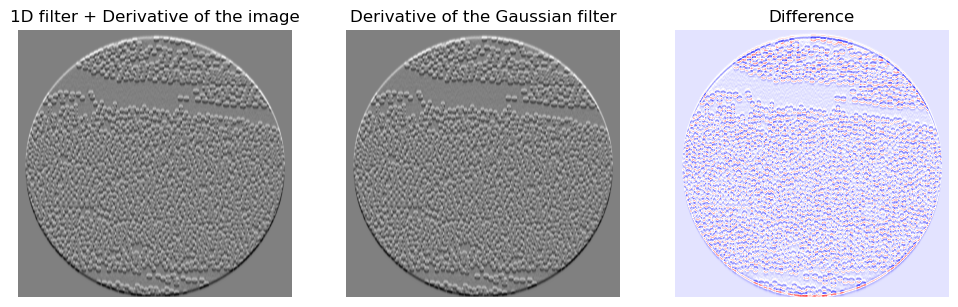

Mean absolute difference: 5.848585887411178


In [6]:
# It is the same to apply the gaussian filter in one direction and then do the derivative of the image
# than to apply the derivative of the gaussian filter in one direction

# Apply the 1D filter in the vertical direction
img_g = convolve(img, g.T) # 1D filter

# Do the derivative in the vertical direction
k = np.array([[0.5, 0, -0.5]]) # Derivative filter
img_gd = convolve(img_g, k.T) # Derivative

# Apply the derivative of the gaussian filter in the vertical direction
img_dg = convolve(img, dg.T) # Derivative

# Show the filtered images (1D and 2D) and the difference with 'bwr' colormap
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_gd, cmap='gray')
plt.title('1D filter + Derivative of the image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img_dg, cmap='gray')
plt.title('Derivative of the Gaussian filter')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img_gd - img_dg, cmap='bwr')
plt.title('Difference')
plt.axis('off')
plt.show()

# Calculate the mean absolute difference
mad = np.mean(np.abs(img_gd - img_dg))
print('Mean absolute difference:', mad)

## Verify big and small Gaussians

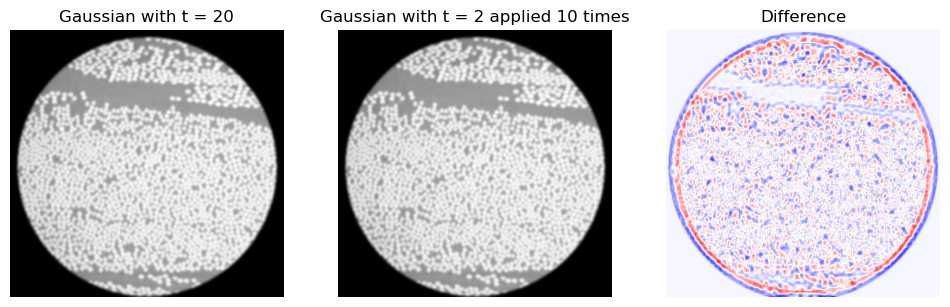

Mean absolute difference: 0.16959914194733997


In [7]:
# Verify that the applying a gaussian with t = 20 is the same as applyint 10 times a gaussian with t = 2.

# Gaussian with t = 20
s = np.sqrt(20)
g, dg = gaussian_filter(s)

# Apply the filter
img_20 = convolve(convolve(img, g), g.T) # 2D filter

# Gaussian with t = 2
s = np.sqrt(2)
g, dg = gaussian_filter(s)

# Apply the filter 10 times
img_10_2 = img.copy()
for i in range(10):
    img_10_2 = convolve(convolve(img_10_2, g), g.T) # 2D filter

# Show the filtered images and the difference with 'bwr' colormap
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_20, cmap='gray')
plt.title('Gaussian with t = 20')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img_10_2, cmap='gray')
plt.title('Gaussian with t = 2 applied 10 times')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img_20 - img_10_2, cmap='bwr')
plt.title('Difference')
plt.axis('off')
plt.show()

# Calculate the mean absolute difference
mad = np.mean(np.abs(img_20 - img_10_2))
print('Mean absolute difference:', mad)

## Verify Gaussian followed by a derivative

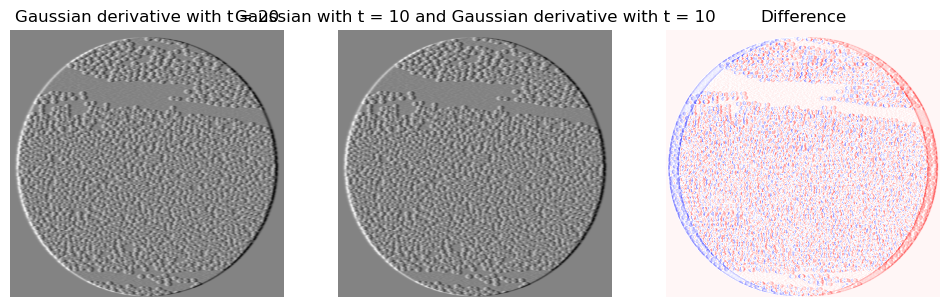

Mean absolute difference: 0.10729336428062537


In [8]:
# It is the same to apply a convolution with a gaussian derivative of t = 20 than to apply a Gaussian of t = 10 and then a Gaussian derivative of t = 10

# Gaussian derivative with t = 20
s = np.sqrt(20)
g, dg = gaussian_filter(s)

# Apply the filter
img_d20 = convolve(img, dg)

# Gaussian with t = 10
s = np.sqrt(10)
g, dg = gaussian_filter(s)

# Apply the filter
img_10 = convolve(convolve(img, g), dg)

# Show the filtered images and the difference with 'bwr' colormap
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_d20, cmap='gray')
plt.title('Gaussian derivative with t = 20')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img_10, cmap='gray')
plt.title('Gaussian with t = 10 and Gaussian derivative with t = 10')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img_d20 - img_10, cmap='bwr')
plt.title('Difference')
plt.axis('off')
plt.show()

# Calculate the mean absolute difference
mad = np.mean(np.abs(img_d20 - img_10))
print('Mean absolute difference:', mad)